<a href="https://colab.research.google.com/github/zoikorda/Mass-Spring-Damper/blob/main/mass_spring_damper_2dof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MASS SPRING DAMPER 2DOF**

The problem is described by a linearized state-space model having the following form:

x'(t)= Ax(t)+ Bu(t)

y(t)= Cx(t)+ Du(t)

where t is time, x is the state vector, u is the input vector, and y is an output vector.
The matrices A, B, C and D are the system matrices.
The vector u represents control inputs acting on the system. The vector y is the vector of observed variables, and the vector x is a state vector, actually the memory of the system.

I estimate a discrete-time version of the above system. The discrete-time system has the following form:

**x(k+1)= Ax(k)+ Bu(k)**

**y(k)= Cx(k)+ Du(k)**

where k is a discrete-time instant. That is, the state and other vectors are approximations of the original state at the time t=kT, where T is a sampling period.

Given the sequence of the input-output data {(u0,y0),(u1,y1),...,(uN,yN)}, where N is the length of the sequence, estimate the system matrices A, B, C, and D up to similarity transformation. The estimated state-space model should accurately reproduce the input-output behavior of the original system.

I use recurrent neural network architectures (Simple Recurrent Networks-SRN and Long Short-Term Memory-LSTM). The goal is to train the parameters of recurrent neural networks such that trained networks produce the input-output behavior of the discrete-time state-space model.

Applying the sequence of control inputs {u0,u1,...,uN}, the model should produce the sequence of outputs {p0,p1,...,pN} that accurately approximates the output sequence {y0,y1,...yN} of the real system.

Please find attached the photos where the mathematical model of differential equations is given.

The state-space model of the spring-mass system is in the continuous-time domain. To transform it into the discrete-time domain, backward euler method is used, according to the following equations:

**[x(k)-x(k-1)]/h = Ax(k)+Bx(k-1)**

,where h is the discretization time step.
The above equation leads to:

x(k)=A'x(k-1)+B'u(k-1)

,where **A'=(I-hA)^(-1)** and **B'= hA'B**

and the output equation remains:
**y(k)= Cx(k)**


(4, 301)
(1, 301)


Text(0.5, 1.0, 'System step response')

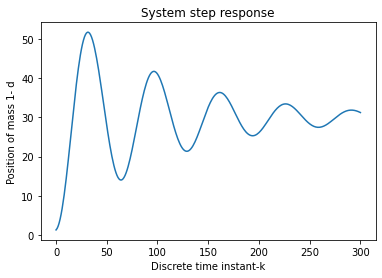

In [24]:
#-------#
# computation of system response on the basis of Backward Euler method.
#-------#

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
 
# define constants
# the constants are selected in such a way as to achieve a typical depiction of the m1 position of the requested system  
c = 0.05
k = 0.1
m = 1

# define the continuous-time system matrices

A=np.matrix([[0, 1, 0, 0],[-2*k/m, -2*c/m, k/m, c/m],[0, 0, 0, 1], [k/m, c/m, -k/m, -c/m]])
B=np.matrix([[0],[0],[0],[1/m]])
C=np.matrix([[1, 0, 1, 0]])

#define an initial state
x0=np.random.rand(4,1)

#print(A, B, C, x0)

#define the number of time-samples (time) and the sampling time for the discretization (sampling)
time=300
sampling=0.5 
 
#define an input sequence for the simulation
#input_seq=np.random.rand(time,1)
input=np.ones(time)

 
# the following function uses the backward Euler method to simulate the state-space model
# input parameters:
#    - A,B,C              - continuous time system matrices 
#    - initial_state      - the initial state of the system 
#    - time_steps         - the total number of simulation time steps 
#    - sampling_period    - the sampling period for the backward Euler discretization 
# the function returns the state sequence and the output sequence which stored in vectors Xd, Yd respectively

def equation(A,B,C,initial_state,input_sequence, time_steps, sampling_period):
    I=np.identity(A.shape[0]) # identity matrix
    #print(I)
    A_dyn=inv(I-sampling_period*A)
    #print(Ad)
    B_dyn=A_dyn*sampling_period*B
    #print(Bd)
    X_dyn=np.zeros(shape=(A.shape[0],time_steps+1))
    Y_dyn=np.zeros(shape=(C.shape[0],time_steps+1))
    #print(Xd,Yd)
     
    for ii in range(0,time_steps):
       if ii==0:
           X_dyn[:,[ii]]=initial_state
           Y_dyn[:,[ii]]=C*initial_state
           x=A_dyn*initial_state+B_dyn*input_sequence[ii]
       else:
           X_dyn[:,[ii]]=x
           Y_dyn[:,[ii]]=C*x
           x=A_dyn*x+B_dyn*input_sequence[ii]
    X_dyn[:,[-1]]=x
    Y_dyn[:,[-1]]=C*x
    return X_dyn, Y_dyn
     
state,output=equation(A,B,C,x0,input, time ,sampling)
print(state.shape)
print(output.shape) 

plt.plot(output[0,:])
plt.xlabel('Discrete time instant-k')
plt.ylabel('Position of mass 1- d')
plt.title('System step response')

NOTES *(about the above code)*

- 0.5 seconds is used for discretization step
  the discretization step is relatively high and adds additional damping to the system discrete-time system.
Here this phenomenon is not handled, and I consider the discrete-time system as a data generating system.
- input=np.ones(time) is used as a step function
  We can use also a random signal as an input
- "equation" is the function that simulates the dynamics and that returns the state and output sequences.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
 
#------------------------------------------------------------------------------
#                   Model defintion
#------------------------------------------------------------------------------
 
# First, we need to define the system matrices of the state-space model:
# this is a continuous-time model, we will simulate it using the backward Euler method

# constant values are adapted for a more clear visualization of models performance
c = 0.00001
k = 0.1
m = 1

A=np.matrix([[0, 1, 0, 0],[-2*k/m, -2*c/m, k/m, c/m],[0, 0, 0, 1], [k/m, c/m, -k/m, -c/m]])
B=np.matrix([[0],[0],[0],[1/m]])
C=np.matrix([[1, 0, 0, 0]]) # !!!---as an output we have the position of m1---!!!
 
#define the number of time-samples (time) and the sampling time for the discretization (sampling)
time=300
sampling=0.5

To learn the model a random input sequence is used and also a random initial condition. 
Recurrent Neural Networks take a tensor input of the following shape:
(batch_size, timesteps, input_features)
The test input data is referred as test_X and the entry test_X[0,:,:] has the above form :

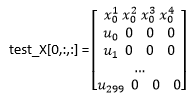

The model has to know the initial state in order to predict the system response. So, the first row of the matrix is equal to the initial state.

The entries on the first column, starting from the row 2 to the row 301 are the input sequence (the force applied to the model). 
The corresponding entries on the second, third and fourth row are equal to zeros. This has been done in order to keep the sliced tensor dimension constant. 

The output, denoted by “output_train” in the code, is defined in the same manner. The output shape is (1,301,1). The first entry of the sliced output is x_{01} and the remaining entries are equal to the observed output sequence.
Here for simplicity, we did not scale the training data. 

For training, validation, and test data we use different initial states and input sequences. That is, for randomly generated input sequences and initial conditions, the system dynamics is simulated to obtain three different input-output data sets that are used for training, test, and validation.

To define the training data, we simulate the system only once, because in real-life applications, it is time-consuming to observe the system dynamics for different inputs and initial conditions, and it often is done only once by performing a single actuation and data collection experiment.

In [26]:
#------------------------------------------------------------------------------
#                  Create the training data
#------------------------------------------------------------------------------

#define an input sequence for the simulation
input_sequence_train=np.random.rand(time,1)

#define an initial state for simulation
x0_train=np.random.rand(4,1)
 
 
#simulation of dynamics
state,output_train=equation(A,B,C,x0_train,input_sequence_train, time ,sampling)    
print(state.shape)

output_train=output_train.T
print(output_train.shape)
# this is the output data used for training
output_train=np.reshape(output_train,(1,output_train.shape[0],1))
 
input_sequence_train=np.reshape(input_sequence_train,(input_sequence_train.shape[0],1))
print(input_sequence_train.shape)
tmp_train=np.concatenate((input_sequence_train, np.zeros(shape=(input_sequence_train.shape[0],3))), axis=1)
print(tmp_train.shape)
print(x0_train.T.shape)
tmp_train=np.concatenate((x0_train.T,tmp_train), axis=0)

# this is the input data used for training
train_X=np.reshape(tmp_train, (1,tmp_train.shape[0],tmp_train.shape[1]))

#------------------------------------------------------------------------------
#               Create the validation data
#------------------------------------------------------------------------------

# new random input sequence
input_sequence_validate=np.random.rand(time,1)

# new random initial condition
x0_validate=np.random.rand(4,1)
 
# create a new ouput sequence by simulating the system 
state_validate,output_validate=equation(A,B,C,x0_validate,input_sequence_validate, time ,sampling)    

output_validate=output_validate.T

# this is the output data used for validation
output_validate=np.reshape(output_validate,(1,output_validate.shape[0],1))
 
input_sequence_validate=np.reshape(input_sequence_validate,(input_sequence_validate.shape[0],1))
tmp_validate=np.concatenate((input_sequence_validate, np.zeros(shape=(input_sequence_validate.shape[0],3))), axis=1)
tmp_validate=np.concatenate((x0_validate.T,tmp_validate), axis=0)

# this is the input data used for validation
validate_X=np.reshape(tmp_validate, (1,tmp_validate.shape[0],tmp_validate.shape[1]))

#------------------------------------------------------------------------------
#               Create the test data
#------------------------------------------------------------------------------

# new random input sequence
input_sequence_test=np.random.rand(time,1)

# new random initial condition
x0_test=np.random.rand(4,1)
 
# create a new ouput sequence by simulating the system 
state_test,output_test=equation(A,B,C,x0_test,input_sequence_test, time ,sampling)    
output_test=output_test.T

# this is the output data used for test
output_test=np.reshape(output_test,(1,output_test.shape[0],1))
 
input_sequence_test=np.reshape(input_sequence_test,(input_sequence_test.shape[0],1))
tmp_test=np.concatenate((input_sequence_test, np.zeros(shape=(input_sequence_test.shape[0],3))), axis=1)
tmp_test=np.concatenate((x0_test.T,tmp_test), axis=0)

# this is the input data used for test
test_X=np.reshape(tmp_test, (1,tmp_test.shape[0],tmp_test.shape[1]))

(4, 301)
(301, 1)
(300, 1)
(300, 4)
(1, 4)


Next, neural networks are defined.
Three network architectures are studied: SimpleRNN, GRU, and LSTM.

! The key difference between GRU and LSTM is that GRU's bag has two gates that are reset and update while LSTM has three gates that are input, output, forget. GRU is less complex than LSTM because it has less number of gates. If the dataset is small then GRU is preferred otherwise LSTM for the larger dataset.

In [27]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import LSTM
from keras.layers import SimpleRNN
from tensorflow.keras.optimizers import RMSprop
from keras.layers import TimeDistributed
from keras.callbacks import ModelCheckpoint
 
model=Sequential()
model.add(LSTM(32, input_shape=(train_X.shape[1],train_X.shape[2]),return_sequences=True))
#model.add(Dense(1))
model.add(TimeDistributed(Dense(1)))  #there is no difference between this and model.add(Dense(1))

model.compile(optimizer=RMSprop(), loss='mean_squared_error', metrics=['mse'])
 
 
# after every epoch, we save the model, this is the absolute path on my C: drive, so the path is
# C:\python_files\system_identification\models\
# The file names are defined according to the validation loss, in order to retrieve the model with the smallest validation loss.
# This should be the “best” model, which should be tested using the test data. 
filepath="\\python_files\\system_identification\\models\\weights-{epoch:02d}-{val_loss:.6f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
callbacks_list = [checkpoint]
history=model.fit(train_X, output_train , epochs=2000, batch_size=1, callbacks=callbacks_list, validation_data=(validate_X,output_validate), verbose=2)
 
 
# load the model with the smallest validation loss
#model.load_weights("weights-1997-1.878475.hdf5")
 
# use the test data to predict the model response
testPredict = model.predict(test_X)

Epoch 1/2000
1/1 - 3s - loss: 30.2899 - mse: 30.2899 - val_loss: 32.2934 - val_mse: 32.2934 - 3s/epoch - 3s/step
Epoch 2/2000
1/1 - 0s - loss: 29.5376 - mse: 29.5376 - val_loss: 31.7083 - val_mse: 31.7083 - 99ms/epoch - 99ms/step
Epoch 3/2000
1/1 - 0s - loss: 28.9817 - mse: 28.9817 - val_loss: 31.1486 - val_mse: 31.1486 - 104ms/epoch - 104ms/step
Epoch 4/2000
1/1 - 0s - loss: 28.4513 - mse: 28.4513 - val_loss: 30.5287 - val_mse: 30.5287 - 105ms/epoch - 105ms/step
Epoch 5/2000
1/1 - 0s - loss: 27.8660 - mse: 27.8660 - val_loss: 29.7558 - val_mse: 29.7558 - 111ms/epoch - 111ms/step
Epoch 6/2000
1/1 - 0s - loss: 27.1390 - mse: 27.1390 - val_loss: 28.6880 - val_mse: 28.6880 - 96ms/epoch - 96ms/step
Epoch 7/2000
1/1 - 0s - loss: 26.1379 - mse: 26.1379 - val_loss: 27.0569 - val_mse: 27.0569 - 98ms/epoch - 98ms/step
Epoch 8/2000
1/1 - 0s - loss: 24.6082 - mse: 24.6082 - val_loss: 24.4710 - val_mse: 24.4710 - 95ms/epoch - 95ms/step
Epoch 9/2000
1/1 - 0s - loss: 22.1519 - mse: 22.1519 - val_los

[[[0.6432448]
  [0.936714 ]
  [1.3678136]
  [1.8672063]
  [2.257217 ]
  [2.6161535]
  [2.84742  ]
  [3.2987216]
  [3.5428882]
  [4.0212507]
  [4.3636107]
  [4.736947 ]
  [5.061566 ]
  [5.4769006]
  [6.0251007]
  [6.4784083]
  [6.997542 ]
  [7.5403647]
  [8.021129 ]
  [8.38829  ]
  [8.638213 ]
  [8.87419  ]
  [8.971397 ]
  [9.057039 ]
  [9.063383 ]
  [9.061293 ]
  [9.012022 ]
  [8.904079 ]
  [8.770779 ]
  [8.624462 ]
  [8.510659 ]
  [8.372635 ]
  [8.134823 ]
  [7.7840977]
  [7.3691835]
  [7.018134 ]
  [6.737126 ]
  [6.5170083]
  [6.334364 ]
  [6.1338496]
  [5.8501043]
  [5.5077825]
  [5.094168 ]
  [4.6444774]
  [4.20246  ]
  [3.8617291]
  [3.5181406]
  [3.2792914]
  [3.061711 ]
  [2.9676085]
  [2.8491864]
  [2.720895 ]
  [2.6094556]
  [2.5479276]
  [2.4299252]
  [2.3488472]
  [2.3398178]
  [2.2777307]
  [2.2562733]
  [2.2515552]
  [2.2912436]
  [2.2869318]
  [2.3682888]
  [2.37943  ]
  [2.5514002]
  [2.6523905]
  [2.8109024]
  [3.0495744]
  [3.2450795]
  [3.5863755]
  [3.7747188]
  [4.0

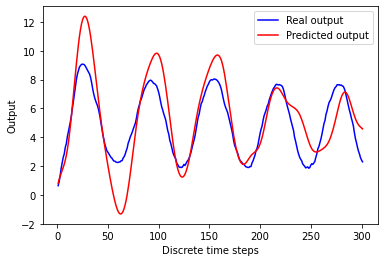

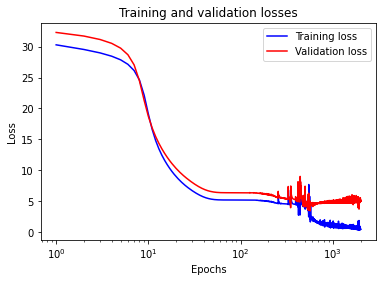

In [28]:
#------------------------------------------------------------------------------
#  Plot the predicted and "true" output and plot training and validation losses
#------------------------------------------------------------------------------

print(testPredict)

# plot the predicted and the "true" (test) outputs
time_plot=range(1,time+2)
plt.figure()
plt.plot(time_plot,testPredict[0,:,0],'b', label='Real output')
plt.plot(time_plot,output_test[0,:],'r', label='Predicted output')
plt.xlabel('Discrete time steps')
plt.ylabel('Output')
plt.legend()
plt.savefig('LSTM_32.png')
plt.show()
 
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.figure()
plt.plot(epochs, loss,'b', label='Training loss')
plt.plot(epochs, val_loss,'r', label='Validation loss')
plt.title('Training and validation losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xscale('log')
plt.legend()
plt.savefig('loss_LSTM_32.png')
plt.show()

In [29]:
model=Sequential()
model.add(GRU(32, input_shape=(train_X.shape[1],train_X.shape[2]),return_sequences=True))
#model.add(Dense(1))
model.add(TimeDistributed(Dense(1)))  #there is no difference between this and model.add(Dense(1))

model.compile(optimizer=RMSprop(), loss='mean_squared_error', metrics=['mse'])
 
 
# after every epoch, we save the model, this is the absolute path on my C: drive, so the path is
# C:\python_files\system_identification\models\
# The file names are defined according to the validation loss, in order to retrieve the model with the smallest validation loss.
# This should be the “best” model, which should be tested using the test data. 
filepath="\\python_files\\system_identification\\models\\weights-{epoch:02d}-{val_loss:.6f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
callbacks_list = [checkpoint]
history=model.fit(train_X, output_train , epochs=2000, batch_size=1, callbacks=callbacks_list, validation_data=(validate_X,output_validate), verbose=2)
 
 
# load the model with the smallest validation loss
#model.load_weights("weights-1997-1.878475.hdf5")
 
# use the test data to predict the model response
testPredict = model.predict(test_X)

Epoch 1/2000
1/1 - 2s - loss: 28.1350 - mse: 28.1350 - val_loss: 30.0227 - val_mse: 30.0227 - 2s/epoch - 2s/step
Epoch 2/2000
1/1 - 0s - loss: 27.3106 - mse: 27.3106 - val_loss: 29.3610 - val_mse: 29.3610 - 100ms/epoch - 100ms/step
Epoch 3/2000
1/1 - 0s - loss: 26.6667 - mse: 26.6667 - val_loss: 28.7522 - val_mse: 28.7522 - 95ms/epoch - 95ms/step
Epoch 4/2000
1/1 - 0s - loss: 26.0746 - mse: 26.0746 - val_loss: 28.1542 - val_mse: 28.1542 - 97ms/epoch - 97ms/step
Epoch 5/2000
1/1 - 0s - loss: 25.4932 - mse: 25.4932 - val_loss: 27.5472 - val_mse: 27.5472 - 95ms/epoch - 95ms/step
Epoch 6/2000
1/1 - 0s - loss: 24.9035 - mse: 24.9035 - val_loss: 26.9183 - val_mse: 26.9183 - 98ms/epoch - 98ms/step
Epoch 7/2000
1/1 - 0s - loss: 24.2929 - mse: 24.2929 - val_loss: 26.2569 - val_mse: 26.2569 - 103ms/epoch - 103ms/step
Epoch 8/2000
1/1 - 0s - loss: 23.6514 - mse: 23.6514 - val_loss: 25.5527 - val_mse: 25.5527 - 97ms/epoch - 97ms/step
Epoch 9/2000
1/1 - 0s - loss: 22.9691 - mse: 22.9691 - val_loss:

[[[0.61564744]
  [0.56866765]
  [0.6233479 ]
  [0.8131645 ]
  [1.0122043 ]
  [1.2765211 ]
  [1.5783181 ]
  [2.0123496 ]
  [2.3995001 ]
  [2.9248965 ]
  [3.3665416 ]
  [3.859082  ]
  [4.4157276 ]
  [5.0040607 ]
  [5.590107  ]
  [6.019516  ]
  [6.4336877 ]
  [6.7223577 ]
  [6.884841  ]
  [7.130578  ]
  [7.573702  ]
  [7.894395  ]
  [8.155357  ]
  [8.336815  ]
  [8.500943  ]
  [8.612101  ]
  [8.677565  ]
  [8.84412   ]
  [9.066674  ]
  [9.307217  ]
  [9.466405  ]
  [9.4114    ]
  [9.306141  ]
  [9.058715  ]
  [8.829397  ]
  [8.693838  ]
  [8.39831   ]
  [8.010824  ]
  [7.5973887 ]
  [7.1758876 ]
  [6.860348  ]
  [6.6065216 ]
  [6.3490586 ]
  [6.0985336 ]
  [5.857766  ]
  [5.605754  ]
  [5.360006  ]
  [5.1520433 ]
  [4.9483867 ]
  [4.858964  ]
  [4.52934   ]
  [4.228499  ]
  [3.9629066 ]
  [3.7781384 ]
  [3.5345702 ]
  [3.299262  ]
  [3.2296503 ]
  [2.9566972 ]
  [2.7270784 ]
  [2.5082905 ]
  [2.3375928 ]
  [2.159589  ]
  [2.062256  ]
  [1.9320455 ]
  [2.0128033 ]
  [1.927567  ]
  [1.89474

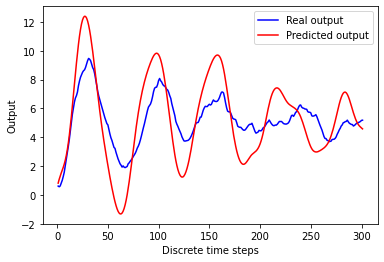

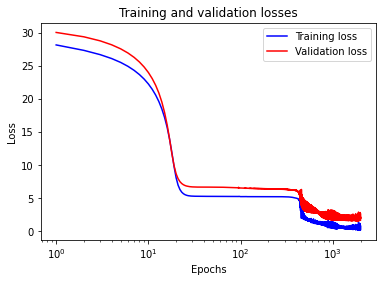

In [30]:
#------------------------------------------------------------------------------
#  Plot the predicted and "true" output and plot training and validation losses
#------------------------------------------------------------------------------

print(testPredict)

# plot the predicted and the "true" (test) outputs
time_plot=range(1,time+2)
plt.figure()
plt.plot(time_plot,testPredict[0,:,0],'b', label='Real output')
plt.plot(time_plot,output_test[0,:],'r', label='Predicted output')
plt.xlabel('Discrete time steps')
plt.ylabel('Output')
plt.legend()
plt.savefig('GRU_32.png')
plt.show()
 
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.figure()
plt.plot(epochs, loss,'b', label='Training loss')
plt.plot(epochs, val_loss,'r', label='Validation loss')
plt.title('Training and validation losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xscale('log')
plt.legend()
plt.savefig('loss_GRU_32.png')
plt.show()

NOTES *(about the above code)*

A relatively high number of units (=32) is needed to estimate the model. This is because we need to increase the number of epochs to obtain better results and secondly, since the model is linear, we need to tell to Keras that we want to use linear activation functions and that we do not need bias.

In [31]:
model=Sequential()
model.add(SimpleRNN(4, input_shape=(train_X.shape[1],train_X.shape[2]),use_bias=False, activation='linear',return_sequences=True))
model.add(Dense(1, activation='linear', use_bias=False))
#model.add(TimeDistributed(Dense(1,activation="linear",use_bias=False)))  #there is no difference between this and model.add(Dense(1))...
model.compile(optimizer=RMSprop(), loss='mean_squared_error', metrics=['mse'])

# after every epoch, we save the model, this is the absolute path on my C: drive, so the path is
# C:\python_files\system_identification\models\
filepath="\\python_files\\system_identification\\models\\weights-{epoch:02d}-{val_loss:.6f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
callbacks_list = [checkpoint]
history=model.fit(train_X, output_train , epochs=4000, batch_size=1, callbacks=callbacks_list, validation_data=(validate_X,output_validate), verbose=2)

testPredict = model.predict(test_X)

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
Epoch 1501/4000
1/1 - 0s - loss: 4.5536 - mse: 4.5536 - val_loss: 5.9367 - val_mse: 5.9367 - 78ms/epoch - 78ms/step
Epoch 1502/4000
1/1 - 0s - loss: 4.5779 - mse: 4.5779 - val_loss: 5.8912 - val_mse: 5.8912 - 73ms/epoch - 73ms/step
Epoch 1503/4000
1/1 - 0s - loss: 4.5401 - mse: 4.5401 - val_loss: 5.9126 - val_mse: 5.9126 - 67ms/epoch - 67ms/step
Epoch 1504/4000
1/1 - 0s - loss: 4.5644 - mse: 4.5644 - val_loss: 5.8659 - val_mse: 5.8659 - 66ms/epoch - 66ms/step
Epoch 1505/4000
1/1 - 0s - loss: 4.5261 - mse: 4.5261 - val_loss: 5.8876 - val_mse: 5.8876 - 63ms/epoch - 63ms/step
Epoch 1506/4000
1/1 - 0s - loss: 4.5504 - mse: 4.5504 - val_loss: 5.8395 - val_mse: 5.8395 - 65ms/epoch - 65ms/step
Epoch 1507/4000
1/1 - 0s - loss: 4.5115 - mse: 4.5115 - val_loss: 5.8613 - val_mse: 5.8613 - 60ms/epoch - 60ms/step
Epoch 1508/4000
1/1 - 0s - loss: 4.5358 - mse: 4.5358 - val_loss: 5.8120 - val_mse: 5.8120 - 68ms/epoch - 68ms/step
Epoch 1509/4000
1

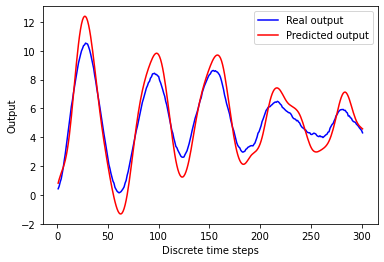

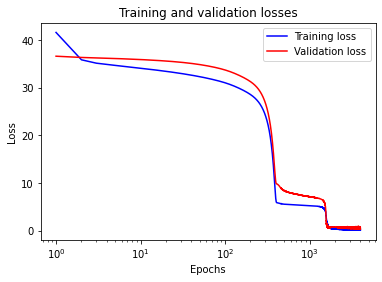

In [32]:
#------------------------------------------------------------------------------
#  Plot the predicted and "true" output and plot training and validation losses
#------------------------------------------------------------------------------
 
# plot the predicted and the "true" (test) outputs
time_plot=range(1,time+2)
plt.figure()
plt.plot(time_plot,testPredict[0,:,0],'b', label='Real output')
plt.plot(time_plot,output_test[0,:],'r', label='Predicted output')
plt.xlabel('Discrete time steps')
plt.ylabel('Output')
plt.legend()
plt.savefig('RNN_8.png')
plt.show()
 
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.figure()
plt.plot(epochs, loss,'b', label='Training loss')
plt.plot(epochs, val_loss,'r', label='Validation loss')
plt.title('Training and validation losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xscale('log')
plt.legend()
plt.savefig('loss_RNN_8.png')
plt.show()

The implementation of the above algorithm was based on a simplier version of the problem (mass spring damper 1dof)  the results of which are presented in the corresponding file. 

***-- Noted that more epochs in the above models as well as a change in the discretization step may bring about a better performance in each model. However, due to high computational cost, I preferred to present the above results.***